In [1]:
from scito import preprocess
import seaborn as sns
import scanpy as sc
import pandas as pd

/Users/antonogorodnikov/anaconda3/envs/scito/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
path = '/Users/antonogorodnikov/Documents/Work/DataSci/SCITO-seq/tests/100k_pbmc_filtered_feature_bc_matrix.h5'
verbose = True

In [3]:
adata = sc.read_10x_h5(path, gex_only=False)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
corr_var = pd.read_csv("/Users/antonogorodnikov/Documents/Work/DataSci/SCITO-seq/tests/var.csv", index_col=0)

In [5]:
adata.var = corr_var

In [6]:
lol = preprocess.ScitoFrame(from_scanpy=True, adata=adata)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [7]:
help(preprocess.ScitoFrame)


Help on class ScitoFrame in module scito.preprocess:

class ScitoFrame(builtins.object)
 |  ScitoFrame(path=None, from_scanpy=False, adata=None)
 |  
 |  Class storing the count matrix
 |  :param path: path to count matrix
 |  :param from_scanpy: bool - is it going to be imported from already available scanpy AnnData? Use if path=None
 |  :param adata: give variable name used for storing scanpy AnnData. Use only if from_scanpy=True
 |  :return:
 |  
 |  Methods defined here:
 |  
 |  __init__(self, path=None, from_scanpy=False, adata=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  resolveMux(self, batchid_string='barcode', positiveQuantile=0.99, n_clust=None, n_init=100, kfunc='kmeans', maxneighbor=100, seed=33, keep_input=False, verbose=False)
 |      Function to assign droplets to sample id and detect singlets vs multiplets. Antibody counts are expected to be
 |      normalized and log scaled (e.g. using sc.pp.normalize_per_cell(), sc.pp.log1p())

In [8]:
lol_2 = lol.resolveMux(batchid_string="barcode",
                        positiveQuantile=0.99,
                        n_clust=None,
                        n_init=100,
                        kfunc="kmeans",
                        maxneighbor=100,
                        seed=33,
                        keep_input=True,
                        verbose=True)

/Users/antonogorodnikov/anaconda3/envs/scito/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
Transforming to str index.


Keeping linear scale data for computing average
Performing k-means clustering


Transforming to str index.
/Users/antonogorodnikov/anaconda3/envs/scito/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/Users/antonogorodnikov/anaconda3/envs/scito/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Cutoff for barcode1: 2127 reads


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Cutoff for barcode2: 731 reads


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Cutoff for barcode3: 680 reads


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Cutoff for barcode4: 909 reads


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Cutoff for barcode5: 810 reads


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Cutoff for barcode6: 1228 reads


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Cutoff for barcode7: 1048 reads


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Cutoff for barcode8: 661 reads


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Cutoff for barcode9: 1100 reads


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Cutoff for barcode10: 231 reads
Keeping sparse matrix with antibody expression only. Target = self.input
Assigning best guesses


In [9]:
lol.__dict__.keys()

dict_keys(['input', 'drop_assign', 'meta', 'n_positive', 'discrete'])

In [10]:
lol.n_positive


matrix([[2.],
        [3.],
        [2.],
        ...,
        [2.],
        [1.],
        [1.]], dtype=float32)

In [11]:
lol_2.obs

,batch,batch_name
AAACCCACAGCGTAGA-1,0,barcode1
AAACCCAGTGGTTTGT-1,0,barcode1
AAACGAAAGGTAGATT-1,0,barcode1
AAACGAACAAGGCGTA-1,0,barcode1
AAACGAACACTCCTTG-1,0,barcode1
...,...,...
TTTGTTGAGGTAACTA-1,1,barcode10
TTTGTTGAGTACCGGA-1,1,barcode10
TTTGTTGCAGCTTTGA-1,1,barcode10
TTTGTTGTCAAGAATG-1,1,barcode10


In [12]:
lol.__dict__.keys()
#lol.drop_assign



dict_keys(['input', 'drop_assign', 'meta', 'n_positive', 'discrete'])

In [13]:
lol.discrete.X.todense()

matrix([[0., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [14]:
lol.meta

,cells_per_drop,N_drops
0,0 cells per drop,0
1,1 cells per drop,17536
2,2 cells per drop,13361
3,3 cells per drop,3717
4,4 cells per drop,666
5,5 cells per drop,67
6,6 cells per drop,20


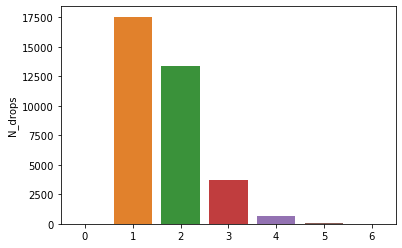

In [15]:
sns.barplot(x = list(range(0,7)), y=lol.meta.N_drops)

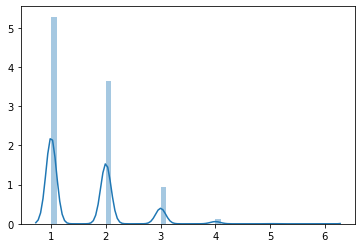

In [17]:
sns.distplot(lol.n_positive)